# ℹ Анализ датасета с фильмами и сериалами Netflix

##### Датасет:

https://www.kaggle.com/datasets/shivamb/netflix-shows


Netflix — одна из самых популярных платформ потокового видео и мультимедиа. На платформе доступно более 8000 фильмов и сериалов, а по состоянию на середину 2021 года у сервиса было более 200 миллионов подписчиков по всему миру. Этот табличный набор данных содержит списки всех фильмов и сериалов, доступных на Netflix, а также информацию об актёрском составе, режиссёрах, рейтингах, годе выхода, продолжительности и т. д.

##### Необходимо провести аналитику по данному датасету и выполнить задания

In [1]:
# Импорт необходимых библиотек

In [3]:
import pandas as pd

In [5]:
import numpy as np

## ✔ Загрузите датасет в DataFrame df и выведите первые 5 строк для ознакомления.

In [6]:
df = pd.read_csv("netflix_titles.csv")

In [7]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## ✔ Проверьте информацию о датасете: количество строк и столбцов, типы данных.

In [8]:
# Строки и столбцы
df.shape

(8807, 12)

In [9]:
# Типы данных + пропуски
df.info

<bound method DataFrame.info of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mab

In [10]:
# Только типы данных
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [11]:
# Статистика по числовым колонкам
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## ✔ Определите количество пропущенных значений (NaN) в каждом столбце.

In [12]:
# Количество пропусков в каждом столбце
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
# Процент пропусков
df.isna().mean() * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [14]:
# Детальная таблица
pd.DataFrame({
    'Пропуски': df.isna().sum(),
    'Процент': (df.isna().sum() / len(df)) * 100
})

,Пропуски,Процент
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
director,2634,29.908028
cast,825,9.367549
country,831,9.435676
date_added,10,0.113546
release_year,0,0.000000
rating,4,0.045418
duration,0,0.000000


## ✔ Заполните пропуски в столбцах:

#### А⇣
* `director, cast, country заполните строкой 'Unknown'.`

In [15]:
df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna('Unknown')

In [16]:
df.head()  # check

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
df # check

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### B⇣
* `date_added заполните самым частым значением (модой) этого столбца.`

In [18]:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

#### C⇣
* `rating заполните модой, но сгруппированной по type (для фильмов и сериалов могут быть разные самые частые рейтинги).`

In [19]:
df['rating'] = df.groupby('type')['rating'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

print("Пропуски после заполнения:")
print(df.isna().sum())

Пропуски после заполнения:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [20]:
# Находим моду для каждой группы
mode_by_type = df.groupby('type')['rating'].transform(lambda x: x.mode()[0])

# Заполняем пропуски
df['rating'] = df['rating'].fillna(mode_by_type)

# Выводим информацию о результатах
print(df)

     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               Unknown  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [21]:
# Проверка результата

In [22]:
## Проверяем, что нет пропущенных значений
print(df.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [23]:
## Проверяем распределение рейтингов по типам
print(df.groupby('type')['rating'].describe())

        count unique    top  freq
type                             
Movie    6131     17  TV-MA  2064
TV Show  2676      9  TV-MA  1147


## ✔ Проверьте наличие и удалите полностью дублирующиеся строки.

In [24]:
# Проверка дубликатов
# Вариант 1

duplicates = df.duplicated()
print(duplicates.sum())  # Выводит количество дубликатов

# Результат: 0

0


In [25]:
# Проверка дубликатов
# Вариант 2
print(f"Дубликатов: {df.duplicated().sum()}")
# Результат: 0

Дубликатов: 0


In [26]:
# Удаление полных дубликатов
df = df.drop_duplicates()

In [27]:
# Проверка после удаления
print(f"Осталось строк: {len(df)}")

# Результат: "Осталось строк: 8807"
# Было: "[8807 rows x 12 columns]"

Осталось строк: 8807


## ✔ Преобразуйте тип данных в столбце date_added из object в datetime

###### `🔴Не рабочие варианты:`

🔴
* `Преобразование в datetime`
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

* `Проверка типа`
print(df['date_added'].dtype)

🔴
* `input: Преобразуйте тип данных`

df['date_added'] = pd.to_datetime(df['date_added'])

* `output: `

ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


🔴
    # input: Преобразование в datetime
df['date_added'] = pd.to_datetime(df['date_added'])

    # Проверка типа
print(df['date_added'].dtype)

    # output: Ошибка в формате даты.

###### 🟢Решение:

In [28]:
# input: Проверьте текущий тип данных столбца date_added:

print(df['date_added'].dtype)

# output: object

object


In [29]:
pip install datetime

In [30]:
import datetime

    <!-- 🔴

    # input: 

    ## Убираем лишние пробелы и преобразуем

df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')

    # output: 
    ---------------------------------------------------------------------------
    AttributeError                            Traceback (most recent call last)
    Cell In[36], line 4
          1 # input: 
          2 
          3 # Убираем лишние пробелы и преобразуем
    ----> 4 df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')
    
    File D:\Apps\Anaconda\Lib\site-packages\pandas\core\generic.py:6299, in NDFrame.__getattr__(self, name)
       6292 if (
       6293     name not in self._internal_names_set
       6294     and name not in self._metadata
       6295     and name not in self._accessors
       6296     and self._info_axis._can_hold_identifiers_and_holds_name(name)
       6297 ):
       6298     return self[name]
    --> 6299 return object.__getattribute__(self, name)
    
    File D:\Apps\Anaconda\Lib\site-packages\pandas\core\accessor.py:224, in CachedAccessor.__get__(self, obj, cls)
        221 if obj is None:
        222     # we're accessing the attribute of the class, i.e., Dataset.geo
        223     return self._accessor
    --> 224 accessor_obj = self._accessor(obj)
        225 # Replace the property with the accessor object. Inspired by:
        226 # https://www.pydanny.com/cached-property.html
        227 # We need to use object.__setattr__ because we overwrite __setattr__ on
        228 # NDFrame
        229 object.__setattr__(obj, self._name, accessor_obj)
    
    File D:\Apps\Anaconda\Lib\site-packages\pandas\core\strings\accessor.py:191, in StringMethods.__init__(self, data)
        188 def __init__(self, data) -> None:
        189     from pandas.core.arrays.string_ import StringDtype
    --> 191     self._inferred_dtype = self._validate(data)
        192     self._is_categorical = isinstance(data.dtype, CategoricalDtype)
        193     self._is_string = isinstance(data.dtype, StringDtype)
    
    File D:\Apps\Anaconda\Lib\site-packages\pandas\core\strings\accessor.py:245, in StringMethods._validate(data)
        242 inferred_dtype = lib.infer_dtype(values, skipna=True)
        244 if inferred_dtype not in allowed_types:
    --> 245     raise AttributeError("Can only use .str accessor with string values!")
        246 return inferred_dtype
    
    AttributeError: Can only use .str accessor with string values!

In [49]:
# input: Автоматическое определение формата

df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True)

# output: Error
# C:\Users\Станислав\AppData\Local\Temp\ipykernel_9324\3357763631.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
#   df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True)

C:\Users\Станислав\AppData\Local\Temp\ipykernel_9324\78844436.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], infer_datetime_format=True)


In [45]:
from pandas._libs.tslibs.parsing import guess_datetime_format

In [46]:
# input: Обработка ошибок

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# output: 

In [48]:
# input: Check (Проверьте текущий тип данных столбца date_added)

print(df['date_added'].dtype)

# Old output: object
# New output: datetime64[ns]

datetime64[ns]


## ✔ Создайте новый столбец year_added, извлекая год из date_added

In [51]:
# input: 

## Создаем столбец с годом
df['year_added'] = df['date_added'].dt.year

## Проверяем
print(df[['date_added', 'year_added']].head())

# output: 
# date_added  year_added
# 0 2021-09-25        2021
# 1 2021-09-24        2021
# 2 2021-09-24        2021
# 3 2021-09-24        2021
# 4 2021-09-24        2021

  date_added  year_added
0 2021-09-25        2021
1 2021-09-24        2021
2 2021-09-24        2021
3 2021-09-24        2021
4 2021-09-24        2021


## ✔ Сколько всего фильмов (Movie) и сериалов (TV Show) в датасете? Постройте круговую диаграмму (pie chart), чтобы визуализировать соотношение.

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


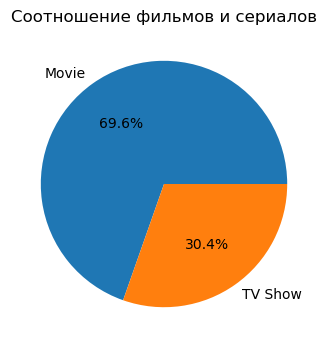

In [59]:
# input: 

    # Считаем количество фильмов и сериалов

count_by_type = df['type'].value_counts()
print(count_by_type)

    # Круговая диаграмма

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.pie(count_by_type.values, labels=count_by_type.index, autopct='%1.1f%%')
plt.title('Соотношение фильмов и сериалов')
plt.show()

# Ожидаемый результат:
    # Результат покажет:
        # Количество Movie
        # Количество TV Show
    # Круговую диаграмму с процентами

# output: 
    # type
    # Movie      6131
    # TV Show    2676
    # Name: count, dtype: int64
    # И круговая диаграмма с "Соотношением фильмов и сериалов. Фильмы: 69.6%. А TV Show: 30.4%" Размер 4х4 вывел. 

## ✔ Какой рейтинг (rating) самый распространенный среди всего контента? Постройте barplot (столбчатую диаграмму) для топ-5 рейтингов.

Топ-5 рейтингов:
rating
TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


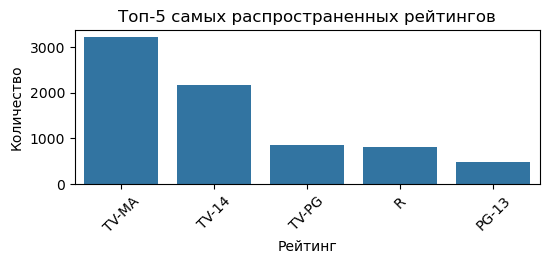

In [60]:
# input: 

    # Самый распространенный рейтинг
top_ratings = df['rating'].value_counts().head()
print("Топ-5 рейтингов:")
print(top_ratings)

    # Barplot
import seaborn as sns

plt.figure(figsize=(6, 2
                ))
sns.barplot(x=top_ratings.index, y=top_ratings.values)
plt.title('Топ-5 самых распространенных рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

# Ожидаемый результат:
    # Покажет самый частый рейтинг
    # Barplot с топ-5 рейтингами
# output:
    # Топ-5 рейтингов:
    # rating
    # TV-MA    3211
    # TV-14    2160
    # TV-PG     863
    # R         799
    # PG-13     490
    # Name: count, dtype: int64

## ✔ Найдите топ-5 стран (country), которые производят больше всего контента для Netflix.

Топ-5 стран:
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
Name: count, dtype: int64


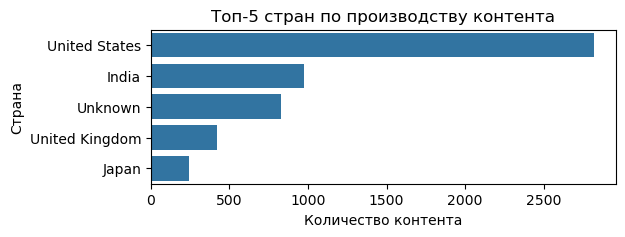

In [62]:
# input: 

    # Топ-5 стран по производству контента
top_countries = df['country'].value_counts().head()
print("Топ-5 стран:")
print(top_countries)

    # Barplot
plt.figure(figsize=(6, 2))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Топ-5 стран по производству контента')
plt.xlabel('Количество контента')
plt.ylabel('Страна')
plt.show()

# Ожидаемый результат:
    # Покажет топ-5 стран
    # Горизонтальный barplot для удобства чтения
# output:
    # Топ-5 стран (country):
        # United States     2818
        # India              972
        # Unknown            831
        # United Kingdom     419
        # Japan              245
    # Name: count, dtype: int64

## ✔ Сколько фильмов/сериалов в жанре "Horror" (столбец listed_in)? 

In [68]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


In [66]:
# input: 

    # Считаем материал в жанре "Horror"
horror_count = df[df['listed_in'].str.contains('Horror', na=False)].shape[0]
print(f"Информации в жанре Horror: {horror_count}")

# output: 
    # Информации в жанре Horror: 432

Информации в жанре Horror: 432


In [70]:
# input: С разбивкой по типам

horror_by_type = df[df['listed_in'].str.contains('Horror', na=False)]['type'].value_counts()
print("Horror по типам:")
print(horror_by_type)

# output:
    # Horror по типам (type):
        # Movie      357
        # TV Show     75
    # Name: count, dtype: int64

Horror по типам:
type
Movie      357
TV Show     75
Name: count, dtype: int64


## ✔ В каком году вышел самый старый фильм (release_year) на Netflix? А в каком самый новый сериал?

In [71]:
# input: 

    # Самый старый фильм
oldest_movie = df[df['type'] == 'Movie']['release_year'].min()
    
    # Самый новый сериал
newest_tv = df[df['type'] == 'TV Show']['release_year'].max()

print(f"Самый старый фильм: {oldest_movie} год")
print(f"Самый новый сериал: {newest_tv} год")

# output: 
    # Самый старый фильм: 1942 год
    # Самый новый сериал: 2021 год

Самый старый фильм: 1942 год
Самый новый сериал: 2021 год
